<a href="https://colab.research.google.com/github/jschw/keras_timeseries_classification/blob/master/Random_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load file

data_test = pd.read_csv('curve_dataset_test.csv', index_col=False)
data_test = data_test.sample(frac=1, random_state=42).reset_index()
data_test.drop(['index'], 1, inplace=True)

data_test[:9][['shape', 'x1', 'y1','x2', 'y2','x3', 'y3','x4', 'y4','x5', 'y5','x6', 'y6','x7', 'y7','x8', 'y8','x9', 'y9','x10', 'y10']]

# Split x/y
X_test = data_test.values[:,0:-1]
Y_test = data_test.values[:,-1]

X_test = X_test.astype('float32')


# Encode label vector
encoder = LabelEncoder()
encoded_Y_test = encoder.fit_transform(Y_test)

# Transform labels to categorical (=one-hot-encoding)
dummy_y_test = to_categorical(encoded_Y_test)
mapping = dict(zip(encoder.classes_, range(1, len(encoder.classes_)+1)))
print('Class mapping:')
print(mapping)


Class mapping:
{'circle': 1, 'line': 2, 'parabola': 3}


 
Ground truth.: 1
 


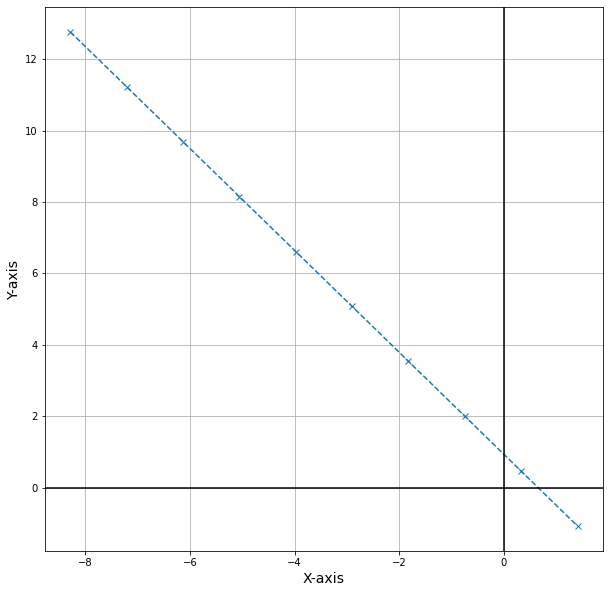

Array notation for structured text:
 
REAL_Datapoints : ARRAY[0..20] OF REAL := [-8.289415,12.772122,-7.2119603,11.232855,-6.1345057,9.693588,-5.0570507,8.154321,-3.979596,6.615054,-2.9021409,5.075787,-1.824686,3.53652,-0.7472312,1.9972528,0.3302237,0.45798582,1.4076786,-1.0812812];
 


In [ ]:
# Get random sample
rand_index = np.random.choice(len(X_test), 1)
predict_arr = X_test[rand_index].reshape(1,20)
predict_ground_truth = dummy_y_test[rand_index]


#print(X_test.shape)
#print(predict_arr)
#print(predict_arr.shape)
print(' ')


x_data = predict_arr[0,0::2]
y_data = predict_arr[0,1::2]

print('Ground truth.: ' + str(np.argmax(predict_ground_truth)))
print(' ')

fig = plt.figure(figsize=[10,10])
plt.plot(x_data,y_data,'--x')
plt.xlabel('X-axis',fontsize=14)
plt.ylabel('Y-axis',fontsize=14)
plt.axhline(y=0, color ="k")
plt.axvline(x=0, color ="k")
plt.grid(True)
plt.show()

num_datapoints = len(predict_arr[0,:])

print('Array notation for structured text:')
print(' ')
array_template = 'REAL_Datapoints : ARRAY[0..' + str(num_datapoints) + '] OF REAL := ['

j=0
for val in range(num_datapoints):
  array_template += str(predict_arr[0,j])
  array_template += ','
  j+=1

array_template = array_template[:-1]

array_template += '];'

print(array_template)
print(' ')